In [1]:
#LESJ_知財に関する統合報告書大賞_企業別形態素解析出力
# テキストをリスト単位で取り込み、リスト単位で形態素解析
import pandas as pd
import MeCab
import fitz
import re
import sys
sys.path.append('/work_dir') 
import talknize_module_20240909 as tk
import csv


In [2]:
#形態素解析の前処理
#分析対象データの特性に対応するため、前処理はモジュールではなくコードとして記載
#talknize_module.pyにも標準的な処理も記載し、適宜使い分け可能にする

#----------------------------------------------------------------------
#テキストファイルの各行に記載された文字列を、処理用文字列として整形・リスト化
def text_to_list(file_path):

    # 空のリストを作成
    return_list = []
    try:
        # 指定されたファイルを読み込み、各行をリストに追加
        with open(file_path, 'r') as file:
            # ファイル内の各行をループし、行末の改行や余分な空白を除去してリストに格納
            return_list = [line.strip() for line in file]
    # ファイルが存在しない場合は例外を無視する
    except FileNotFoundError:
        pass
    # リストを返す
    return return_list

#----------------------------------------------------------------------
#形態素解析前のテキストデータ処理（
#形態素解析の前に、無駄な記号やヘッダ・フッタ等の文言をテキストから除外
def pre_tk(text, excl_list):

    replaced_text = text

    #exclusion_list処理前に処理する必要のあるもの
    #【特例処理】除外処理前に、文頭のこれら記号は「箇条書き」とみなし、続く文言を一文として扱う
    replaced_text = re.sub(r'[■□▪▫▲△▶▷▸▹▼▽◆◇●〇]', '。\n', replaced_text)
    #replaced_text = re.sub(r'[〇●◇◆□■▶△▲▽▼▫▪▹▶▸]', '', replaced_text)#上記以外は除去

    exclusion_list = []    
    exclusion_file1 = "userdic/exclusion_phrases1.txt"  # 各企業の除外フレーズを記載したリスト
    exclusion_file2 = "userdic/exclusion_codes.txt"  # その他記号・年月日・URL等を除外するためのリスト
    #exclusion_file3 = "userdic/exclusion_phrases2.txt"  # 各企業の除外フレーズを記載したリスト2（pageinfoから都度取り込み）
#    exclusion_list = text_to_list(exclusion_file1) + text_to_list(exclusion_file2)+ text_to_list(exclusion_file3)
    exclusion_list = excl_list + text_to_list(exclusion_file1) + text_to_list(exclusion_file2)

    for pattern in exclusion_list:
        replaced_text = re.sub(pattern, ' ', replaced_text)

    return replaced_text


In [3]:
#形態素解析の後処理
#形態素解析結果（tokenリスト）から、ストップワード、特定の条件の文字列等を除外
#import fitz
#import re
from collections import OrderedDict
import re

def post_tk(tokens):
    
    replaced_list = tokens    

    # stopwords（ファイルに格納）を除去
    path_stopwords = "userdic/stopwords.txt"
    stopwords = text_to_list(path_stopwords)
    stopwords = list(OrderedDict.fromkeys(stopwords)) # 元の順序を保持しつつ、重複を除去（# Python 3.7以降）
    replaced_list = [t for t in replaced_list if t not in stopwords]
    
    # ひらがなのみの要素を除去
    kana_re = re.compile("^[ぁ-ゖ]+$")
    replaced_list = [t for t in replaced_list if not kana_re.match(t)]

    # アルファベット1文字のみの要素を除去
    alphabet_re = re.compile("^[a-zA-Z]$")
    replaced_list = [t for t in replaced_list if not alphabet_re.match(t)]

    #特定の形態の数値要素を除去
    number_re = re.compile("^[\d,]+")
    replaced_list = [t for t in replaced_list if not number_re.match(t)]

    
    return replaced_list

In [60]:
industry = '化学'
company_name = 'デンカ'
company_code = '40610'
doc_name = 'denkareport2024'
#analysis_area = 'CEO_Message'
analysis_area = 'R&D'

#open_file='ir/2025/40610_デンカ/denkareport2024_CEO.txt'
open_file='ir/2025/40610_デンカ/denkareport2024_RD.txt'
with open(open_file, "r", encoding="utf-8") as file:
    text = file.read()
    #無駄な改行を削除の上で'。'で改行、一文の範囲を明確にする
page_text=[]
#text = re.sub(r'。','。\n', re.sub(r'\n\n+','', text))
text = re.sub(r'。','。\n', text)
page_text.append(text)

print(page_text[0])


研究開発方針推進体制当社グループは、「一番上手にできる技術」の幅を広げ、持続可能な社会に貢献できるデンカならではの製品開発を推進し、新たな価値を生み出す魅力的な新規事業・製品の創出を加速していきます。
そのために、複数の異種技術を融合し、組織の境界、領域を超えたデンカグループ全体のシナジー効果を発揮すべく、グループの総合力を活かす研究開発を推進します。
　

研究開発費（連結）の推移2019～2023年度の5年間の研究開発費は平均1 4 8 億円／年となり、2023年度は152億円の実績でした。


研究員数（連結）の推移2023年度の研究員数は864名となり、4年間で約20名増加となりました。


ロードマップ


●メガトレンドに則った研究開発の強化、推進
●社内の有効な技術情報の共有を目的とした研究開発ポータルサイト構築
●CO₂削減や循環型社会形成のための新プロセスの導入・開発を展開

研究部門では、当社のコアバリューの一つである「挑戦」というDNA を特に強く引継ぎ、注力分野であるICT &amp; Energy、Healthcare、Sustainable Livingにおける新事業創出、新製品開発、既存製品の更なる展開を進めています。
経営計画「Mission 2030」の目標達成に向け、メガトレンドに合った、顧客ニーズに立脚した適切な研究テーマの設定とリソースの配分、DX活用による研究スピードの向上、産学官とのオープンイノベーションの推進を行っています。
新事業開発部門の新事業創出部とデンカイノベーションセン

ターでは、昨年設立したコーポレート・ベンチャー・キャピタルによるスタートアップとの協業を積極的に進めており、出資案件も出てきました。
コーポレート機能を持つ研究統括部、知的財産部、解析技術研究部では、各事業部門の成長に向けた社内外におけるシナジー発現や、事業推進に向けたIPL※の取り組みも行っています。
社会に新しい価値を創出するイノベーションの実現には、多様性、異種の尊重が必須です。
多くの人の持つ技術、経験、知識、アイデアを融合し、社会に貢献する製品を数多く生み出していきたいと考えています。


常務執行役員　Chief Scientiﬁc Ofﬁcer 戸谷 英樹

とや ひでき

CSOメッセージ


【2023年度実績】
●顧客の将

In [61]:
eliminate_list=[]
#ページインデックス付きで、形態素解析結果をページ単位で格納
tokenized_page_text = [(index, post_tk(tk.mecab_tokenizer(pre_tk(item, eliminate_list))))for index, item in enumerate(page_text)]

In [62]:
#抽出ページ単位の形態素リスト
Extracted_tokenized_page_text = [(index, sublist) for index, sublist in tokenized_page_text]
#該当ページのインデックスリスト
Extracted_tokenized_page_index = [index for index, sublist in tokenized_page_text]
#形態素解析前の抽出ページ単位テキスト
Extracted_page_text = [page_text[0] ]

In [63]:
#以降、Wordlist/WordcloudとCentrality,Network図作成
from collections import Counter
import pandas as pd
import itertools
import datetime


In [64]:
#ファイル出力時に使用する年月日文字列の取得（全処理共通）
# 現在の日付と時刻を取得
now = datetime.datetime.now()
# 年月日と時刻の文字列を生成
date_time_string = now.strftime("%Y%m%d-%H%M%S")

In [65]:
#Word_listの作成
#抽出されたページの形態素（サブリスト）を一つのリストにまとめる
Merged_Extracted_tokenized_list = [item for _, sublist in Extracted_tokenized_page_text for item in sublist]
#Merged_Extracted_tokenized_list = page_text
#print(Merged_Extracted_tokenized_list)
#辞書形式で単語をカウント
counter = Counter(Merged_Extracted_tokenized_list)

# 単語、件数をDataFrameに格納
count_df = pd.DataFrame(list(counter.items()), columns=['単語', '件数'])
# DataFrameを件数でソート
count_df = count_df.sort_values(by='件数', ascending=False)

# 新しい列を追加
count_df.insert(0, '業種', industry)
count_df.insert(1, 'コード', company_code)
count_df.insert(2, '企業名', company_name)
count_df.insert(3, '分析範囲', analysis_area)
# 結果をCSVファイルに出力
file_name = f"output/{company_code}_{company_name}_{date_time_string}_Word_list.csv"
count_df.to_csv(file_name, encoding="utf_8_sig", index=False)

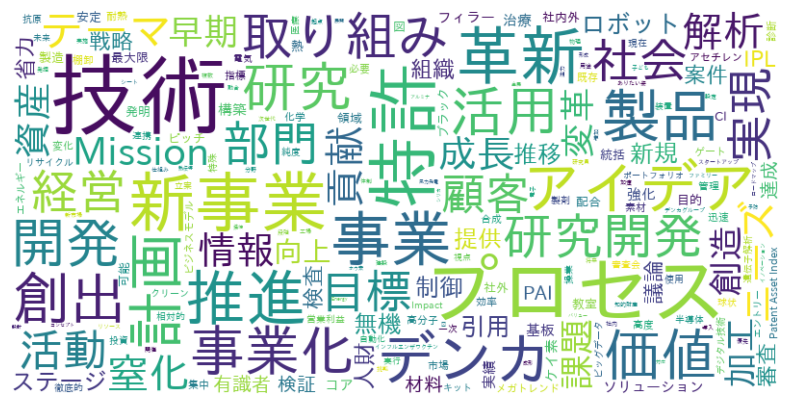

In [66]:
#抽出単語によるワードクラウド作成
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 日本語フォントのパスを指定
jp_font_path = '/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf'

# ワードクラウドのフォーマット指定
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path=jp_font_path)
# 単語とその頻度を辞書形式に変換
word_freq = {word: freq for word, freq in zip(count_df['単語'], count_df['件数'])}
# ワードクラウドの生成
wordcloud.generate_from_frequencies(word_freq)

# プロット
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 結果をpngファイルに出力
file_name_wordcloud=f'output/{company_code}_{company_name}_{date_time_string}_WordCloud.png'
wordcloud.to_file(file_name_wordcloud)

In [67]:
#tf-idf用に、ファイル名、企業名、トークンを出力

# データフレームの作成：pdfファイル名とトークンを格納
#df_token = pd.DataFrame({"company_name": company_name, "doc_name": doc_name, "token": [Merged_Extracted_tokenized_list]})

#file_name_token=f'output/{company_code}_{company_name}_{date_time_string}_Token.csv'
#df_token.to_csv(file_name_token, encoding="utf_8_sig", index=False)

In [68]:
#以降、共起分析
#Extracted_page_text（抽出ページ単位のリスト）を、要素一つのリストに集約
Merged_Extracted_page_text = "\n\n".join(Extracted_page_text)
#print(Merged_Extracted_page_text)

#前処理したテキストを準備
Processed_Merged_Extracted_page_text = pre_tk(Merged_Extracted_page_text, eliminate_list)
#print(Processed_Merged_Extracted_page_text)

#集約・前処理したテキストを「。」で区切り、形態素解析（共起分析用）
sentences = [post_tk(tk.mecab_tokenizer(sentence)) for sentence in re.split("。", Processed_Merged_Extracted_page_text)]
#print(sentences)

In [69]:
#各文中の、形態素組み合わせを作る
sentences_combs = [list(itertools.combinations(sentence,2)) for sentence in sentences]
#print(sentences_combs[0])

#組み合わせた2つの形態素の並びをソート
words_combs = [[tuple(sorted(words)) for words in sentence] for sentence in sentences_combs]
#print(words_combs[0][:30])
target_combs = []
for words_comb in words_combs:
    target_combs.extend(words_comb)
ct = Counter(target_combs)
#print(ct)
df = pd.DataFrame([{"1番目" : i[0][0], "2番目": i[0][1], "count":i[1]} for i in ct.most_common()])

#ファイル出力
file_name_comb = f"output/{company_code}_{company_name}_{date_time_string}_Co_Occurrence.csv"
df.to_csv(file_name_comb, encoding="utf_8_sig", index=False)

In [70]:
#df.head(30)

In [71]:
#ネットワーク分析の下準備
import networkx as nx
from networkx.algorithms.community import girvan_newman
import network_plot_module as npm
import json

#########################################################
# 分析対象とする共起単語の組み合わせ数（ノード数）を指定
analyzed_links = 350
limited_df = df.head(analyzed_links)
#########################################################
# DataFrameからネットワークを作成
G = nx.from_pandas_edgelist(limited_df, '1番目', '2番目', ['count'])


In [72]:
#print(G)
#limited_df.head(30)

In [73]:
# 各ノードの中心性を計算
try:
    degree_centrality = nx.degree_centrality(G)
except:
    degree_centrality = {node: '' for node in G.nodes()}
    
try:
    betweenness_centrality = nx.betweenness_centrality(G)
except:
    betweenness_centrality = {node: '' for node in G.nodes()}

try:
    closeness_centrality = nx.closeness_centrality(G)
except:
    closeness_centrality = {node: '' for node in G.nodes()}

try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
except:
    eigenvector_centrality = {node: '' for node in G.nodes()}

try:
    katz_centrality = nx.katz_centrality(G)
except:
    katz_centrality = {node: '' for node in G.nodes()}

# Girvan-Newmanアルゴリズムでコミュニティに分割
comp = girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

# 各ノードがどのコミュニティに属するかを記録
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# 中心性を新しいデータフレームに格納
centrality_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
#    'Katz Centrality': [katz_centrality[node] for node in G.nodes()],
    'Community': [community_map[node] for node in G.nodes()]  # コミュニティ情報を追加
    })
#print(centrality_df)

file_name_comb = f"output/{company_code}_{company_name}_{date_time_string}_Centrality_{analyzed_links}.csv"
centrality_df.to_csv(file_name_comb, encoding="utf_8_sig", index=False)

In [74]:
#ネットワーク図を描画、ファイル出力
got_net = npm.kyoki_word_network(limited_df)
#フィルタボタンを表示させる場合は、set_optionを無効にする必要あり
#got_net.show_buttons(filter_=['physics'])
got_net.set_options("""
const options = {
  "physics": {
    "forceAtlas2Based": {
      "centralGravity": 0.1,
      "springLength": 25,
      "springConstant": 0.1
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")
file_name_kyoki = f'output/{company_code}_{company_name}_{date_time_string}_kyoki_{analyzed_links}.html'
got_net.show(file_name_kyoki)

In [58]:
#処理した条件をテキストファイルに出力
file_name_condition=f'output/{company_code}_{company_name}_{date_time_string}_Condition.txt'

# ファイルを書き込みモードで開く
with open(file_name_condition, 'w') as file:
    # 各変数の値をテキストファイルに書き込む
    file.write(f"Company code = {company_code}\n")
    file.write(f"Company name = {company_name}\n")
    file.write(f"Industry = {industry}\n")
    file.write(f"File = {open_file}\n")
    file.write(f"Analysis area = {analysis_area}\n")
    file.write(f"Target Page = {man_page_index}\n")
    file.write(f"Analyzed Links = {analyzed_links}\n")


NameError: name 'man_page_index' is not defined